In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nous verrons ici les examples et comment commencer à coder de la modélisation physique

# Méthode de modélisation d'équations différentielles d'ordre 2

## Exemples de différences finis

### 1. Action de la gravité sur un fluide borotropique au repos

sur un fluide au repos nous pouvons le modéliser par : 
$$
\rho \vec{f} = \vec{\nabla}P 
$$

Un fluide borotropique est caractérisé par une fonction h tel que : 
$$
h(\rho) = P
$$
Donc, nous pouvons écrire : 
$$
\rho \vec{f} = \vec{\nabla}(h(\rho)) = \vec{\nabla}(\rho)h'(\rho)
$$

D'un autre côté nous avons $\vec{f}$, la force de gravité unidirectionnelle qui s'écrit $g\vec{e}_z$. Nous pouvons donc conclure que $\rho$ ne s'applique que dans une seule direction (z) que nous pouvons écrire : 
$$
\rho(z) g = \rho'(z) h'(\rho(z)) = \partial_z h(\rho(z))
$$

L'intuition nous dit que la masse volumique va se consentrer en bas. Nous allons donc faire une méthode descendante en z avec un pas d'espace $\Delta z$: 
$$
\rho_ig = \frac{h(\rho_{i}) - h(\rho_{i-1})}{\Delta z}
$$

Nous avons donc la méthode (en décalant les points d'un cran): 
$$
h(\rho_i) = g\Delta z (h(\rho_{i+1})-\rho_{i+1})
$$

Nous pouvons faire une approximation linéaire entre i et i+1 ($h(x) \approx h_ax + C$). Nous appelerons $h_i = h(\rho_{i+1})$ et C la constante à i+1:

$$
\rho_i = \frac{g\Delta z [(h_{i+1}-1)\rho_{i+1} + C]-C}{h_{i+1}}
$$


Prenons comme example $h(x) = x^2$ (so $h(x_i) \approx 2x_ax - x_a^2$). Avec $\rho_0 = 1.001$. Nous avons : 
$$
\rho_i = \frac{g\Delta z [(2\rho_{i+1}-1)\rho_{i+1} - \rho_{i+1}^2] + \rho_{i+1}^2}{2\rho_{i+1}} = 0.5g\Delta z(\rho_{i+1}-1) + 0.5\rho_{i+1}
$$

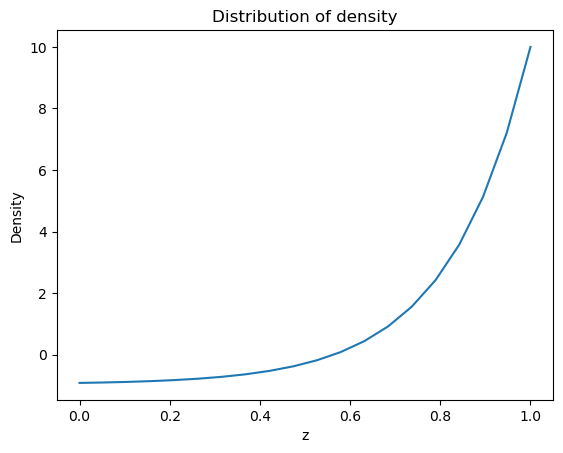

In [2]:
g = 9.81
dzm = 20
l = 1
dz = l/dzm
z = np.linspace(0, l, dzm)
rho = np.zeros(len(z))
rho[-1] = 10

for i in range(len(z)-1) :
    rho[-i-2] = 0.5*g*dz*(rho[-i-1] - 1) + 0.5*rho[-i-1]

plt.plot(z,rho)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Distribution of density")
plt.show()

Nous pouvons faire une généralisation

In [3]:
def f(a) :
    return (2*a,-a**2)


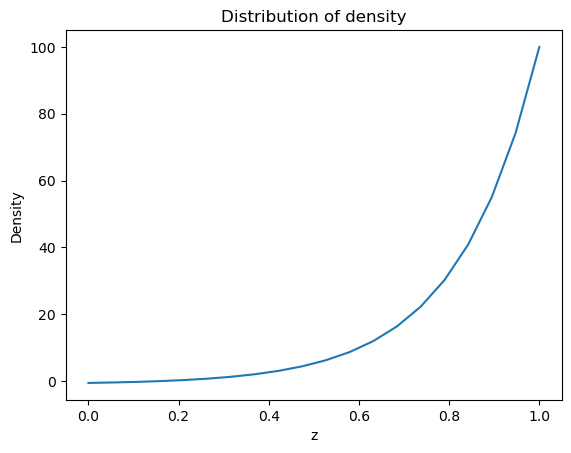

In [4]:
def borotrop() :
    g = 9.81
    dzm = 20
    l = 1
    dz = l/dzm
    z = np.linspace(0, l, dzm)
    rho = np.zeros(len(z))
    rho[-1] = 100

    for i in range(len(z)-1) :
        h = f(rho[-i-1])
        rho[-i-2] = (g*dz*((h[0] - 1)*rho[-i-1] + h[1]) - h[1])/(h[0])

    plt.plot(z,rho)
    plt.xlabel("z")
    plt.ylabel("Density")
    plt.title("Distribution of density")
    plt.show()
    
borotrop()

Dans un gaz diatomique $P = \alpha\rho^{7/5}$ (définissons $\alpha = 5/7$): 

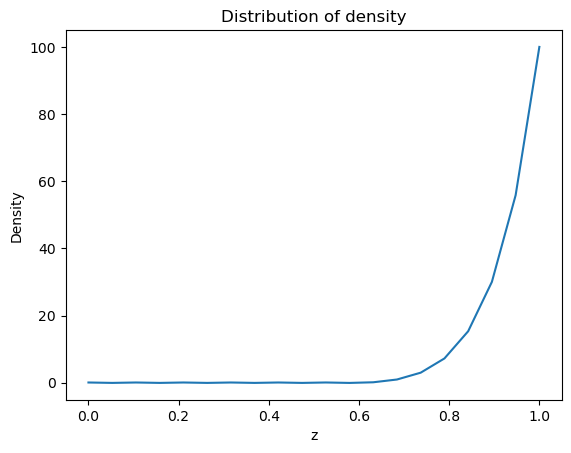

In [5]:
def f(a) :
    return (np.abs(a)**(2/5),-2*np.abs(a)**(7/5)/7)

borotrop()

### 2. Circulation d'un fluide en 2 dimentions

Prenons un fluide en Deux dimentions suivant :
$$
\vec{u} = \frac{-Ay\vec{e}_x + Ax\vec{e}_y}{x^2 + y^2}
$$

Avec A réel

Nous pouvons dans un premier temps modéliser le fluide : 

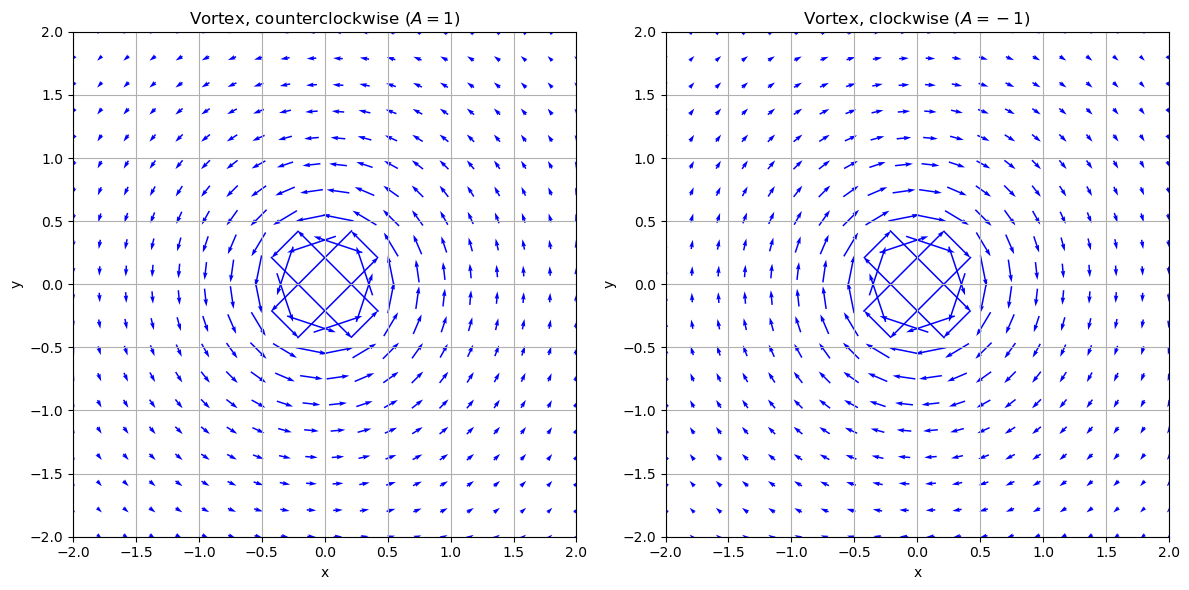

In [6]:
def velocity_field(x, y, A):
    denom = x**2 + y**2
    u_x = (-A* y) / denom
    u_y = (A * x) / denom
    return u_x, u_y

# Grid for plotting
x, y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
# Avoid division by zero at the origin
x[x == 0] = 0.01
y[y == 0] = 0.01

# Parameters and cases
cases = [
    {"A": 1, "label": "Vortex, counterclockwise"},
    {"A": -1, "label": "Vortex, clockwise"},
]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, case in zip(axes.flatten(), cases):
    A = case["A"]
    u_x, u_y = velocity_field(x, y, A)
    ax.quiver(x, y, u_x, u_y, color="blue", pivot="middle")
    ax.set_title(f"{case['label']} ($A={A}$)")
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid()

plt.tight_layout()
plt.show()

Nous pouvons aussi le remarqué en calculant le potentiel et la fonction de courant: 

$$
\partial_z W= u_x - iu_y = -\frac{Ay}{R^2} - i\frac{Ax}{R^2} = \frac{-Ai\bar{z}}{z\bar{z}} = \frac{-Ai}{z}
$$
Donc :  
$$
W = -Ai\ln(z) + C
$$
Prenons $z = Re^{i\theta}$
$$
W = -A\left( i\ln(R) - \theta \right) + C
$$
$$
\varphi = A\theta + Real(C)
$$

Les lignes de courants font des lignes partant du centre. Nous pouvons conclure que le fluide circule de manière sphérique.

Nous pouvons trouver la circulation à travers une fonction entre deux points en faisant : 

$$
\Gamma_C = Real\left( \int_C \partial_z W dz \right)
$$

Prenons l'hypothèse que n'importe quel chemin se caractérise par une succession de lignes. Calculons donc avec une ligne allant d'un point a à un point b (complexes): 

$$
\Gamma_{Ci} = Real\left( \int_{Ci} \partial_z W dz \right) = Real\left( \int_{a}^b \frac{-Ai}{z} dz \right) = Real\left[ -A\left( i\ln(R) - \theta \right) \right]_a^b = A\theta_b - A\theta_a
$$
Et le flux : 
$$
Q_{Ci} = Im\left( \int_{Ci} \partial_z W dz \right) = A\ln(R_a) - A\ln(R_b)
$$

$$
\Gamma_c = \sum_i \Gamma_{Ci}
$$
$$
Q_C = \sum_i Q_{Ci}
$$

Nous pouvons calculer ça : 

(0.0, 0.0)

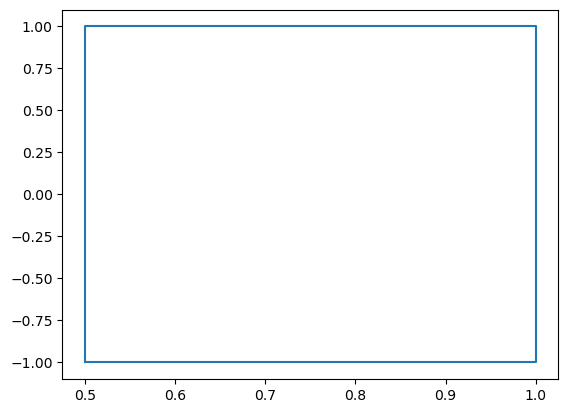

In [7]:
def circ(x,y,A) : 
    Gamm = 0
    Q = 0

    for i in range(len(x) - 1):
        # Calcul de Gamma_i
        theta_i = (np.arctan2(y[i], x[i]))
        theta_i_next = np.arctan2(y[i + 1], x[i + 1])
        Gammi = A * (theta_i_next - theta_i)
        Gamm += Gammi

        # Calcul de Q_i
        r_i = np.sqrt(x[i]**2 + y[i]**2)
        r_i_next = np.sqrt(x[i + 1]**2 + y[i + 1]**2)
        Qi = A * (np.log(r_i) - np.log(r_i_next))
        Q += Qi
        
    return (Gamm,Q)

A = 1
x = [0.5,1,1,0.5,0.5]
y = [-1, -1, 1, 1,-1]
plt.plot(x,y)
circ(x,y,A)

Ce que l'on attend d'un trajet polygonale. Nous pouvons aussi le faire pour un petit mur : 

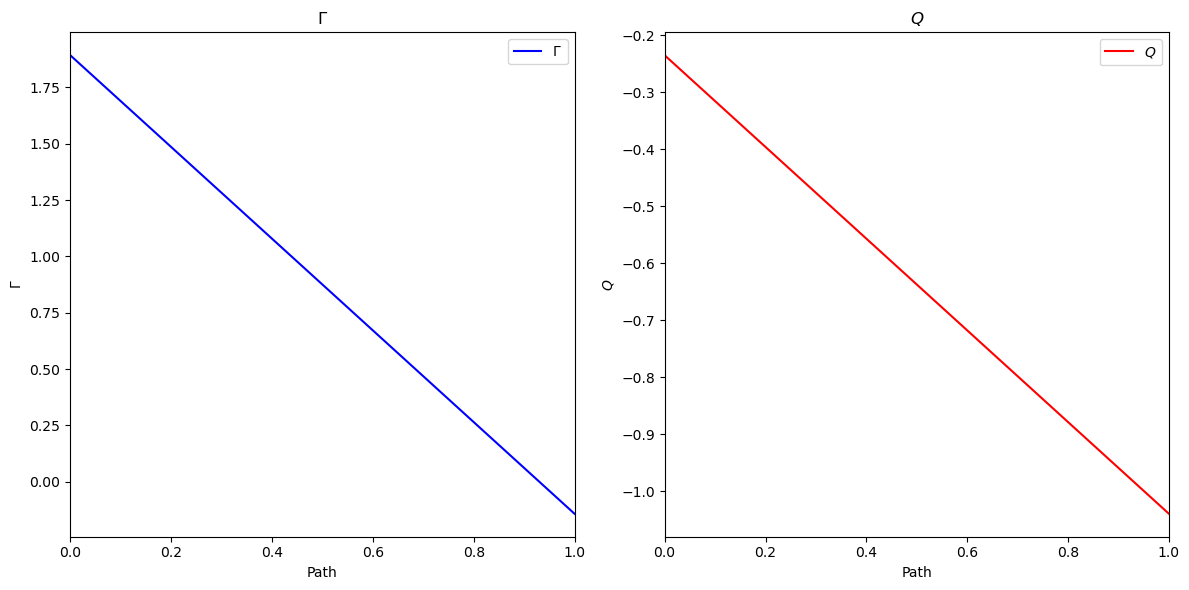

In [8]:
A = 1
x1 = [0.5,1]
y1 = [-1, 1]

C_1 = circ(x1,y1,A)

x2 = [0.5,1]
y2 = [-1, -3]

C_2 = circ(x2,y2,A)

C_2

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Gamma (C_1) on the first subplot
axes[0].plot([0, 1], [C_1[0], C_2[0]], label=r'$\Gamma$', color='b')
axes[0].set_title(r'$\Gamma$')
axes[0].set_xlim([0, 1])
axes[0].set_xlabel('Path')
axes[0].set_ylabel(r'$\Gamma$')
axes[0].legend()

# Plot Q (C_2) on the second subplot
axes[1].plot([0, 1], [C_1[1], C_2[1]], label=r'$Q$', color='r')
axes[1].set_title(r'$Q$')
axes[1].set_xlim([0, 1])
axes[1].set_xlabel('Path')
axes[1].set_ylabel(r'$Q$')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

Nous pouvons voir dans cette example le changement si on change le second point de la ligne

### 3. Calcul de l'énergie d'une particule dans une boite. 

Une particule libre suit l'équation de Schrodinger quand celle ci est égal à 0 : 
$$
-\frac{\hbar^2}{2m}\partial^2_x\Psi = \hat{H}\Psi = E\Psi
$$

Cette équation est respectée tant que la particule reste dans la boite de longueur L.
$$
\partial^2_x\Psi = \frac{\Psi_{i+1} - 2\Psi_i + \Psi_{i-1}}{\Delta x^2}
$$

Nous pouvons donc faire une matrice A bidiagonale avec en sa diagonale $\frac{\hbar^2}{m\Delta x^2} - E$ et les surdiagonales $-\frac{\hbar^2}{2m\Delta x^2}$ tel que $A\Psi = 0$ (avec $Psi$ la matrice des $\Psi_i$). 

Nous avons les conditions aux limites $\Psi(x) = 0$. Ce qui ne change pas la matrice. Ce que l'on veut, c'est connaître les valeurs plosibles de E. Nous allons donc trouver quand le déterminant de A est 0 : 

C:\Users\Killiann\AppData\Local\Temp\ipykernel_22500\3144202631.py:28: RuntimeWarning: overflow encountered in double_scalars
  if d[i] * d[i + 1] < 0:


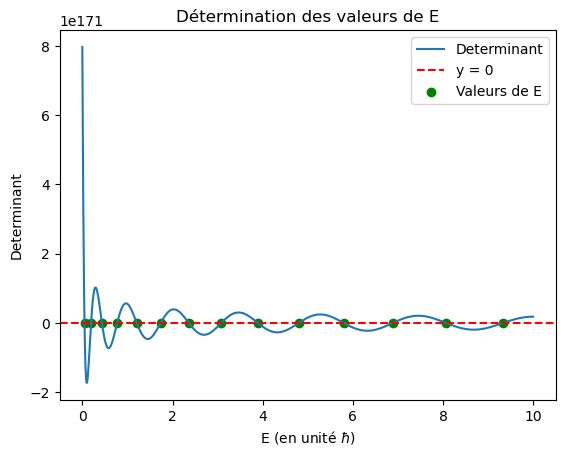

Valeurs de E possible: [0.04857516652472879, 0.1935286176614419, 0.43510839838188564, 0.773030647669121, 1.2069708900149854, 1.7364859364696275, 2.36106120266154, 3.0801048672022087, 3.8929074841534406, 4.798692973351203, 5.796574646017893, 6.885594867379857, 8.064698015681866, 9.332741671020333]


In [9]:
def matA(L, E, Dx, m):
    h = 1
    A = np.zeros((L, L))
    for i in range(L):
        A[i][i] = h**2 / (m * Dx) - E
    A[0][1] = -h**2 / (2 * m * Dx)
    A[-1][-2] = -h**2 / (2 * m * Dx)
    for i in range(L - 1):
        A[i][i + 1] = -h**2 / (2 * m * Dx)
        A[i + 1][i] = -h**2 / (2 * m * Dx)
    return A


L = 100
Dx = 1 / L
m = 1
E = np.linspace(0, 10, 1000)  
d = np.zeros(len(E))          


for i in range(len(E)):
    A = matA(L, E[i], Dx, m)
    d[i] = np.linalg.det(A)


zero_crossings = []
for i in range(len(d) - 1):
    if d[i] * d[i + 1] < 0:  
        root = E[i] - (d[i] * (E[i + 1] - E[i]) / (d[i + 1] - d[i]))
        zero_crossings.append(root)


plt.plot(E, d, label="Determinant")
plt.axhline(0, color='red', linestyle='--', label="y = 0")  # Horizontal line at y=0
plt.scatter(zero_crossings, [0] * len(zero_crossings), color='green', label="Valeurs de E")
plt.xlabel("E (en unité $\hbar$)")
plt.ylabel("Determinant")
plt.title("Détermination des valeurs de E")
plt.legend()
plt.show()


print("Valeurs de E possible:", zero_crossings)

Nous voyons que E peut prendre des valeurs très précises en fonction de la périodicité de la fonction. Normalement, celui-ci doit prendre une forme $\alpha n^2$. Cherchons le $\alpha$. Nous pouvons déjà trouver n (le début n'est pas forcément 1). Puis avoir alpha. La variance de alpha nous permettra d'estimer une erreur (nous allons enlever le point 0 qui est victime d'une erreur plus grosse. Nous pouvons à postériori changer le graph en fonction) : 

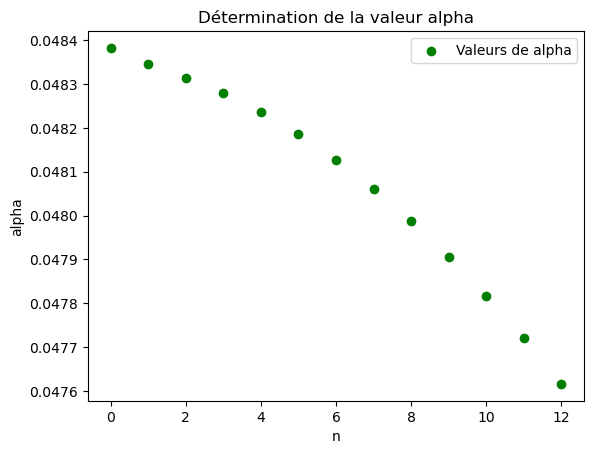

array([ 1.        ,  2.00228343,  3.00384816,  4.00737918,  5.01343466,
        6.02220319,  7.0340435 ,  8.04973312,  9.06952532, 10.09416161,
       11.12397852, 12.1596288 , 13.20165998])

In [10]:
n = np.zeros(len(zero_crossings) - 1)
alph = np.zeros(len(zero_crossings) - 1)
ncorr = np.zeros(len(zero_crossings) - 1)

for i in range(len(zero_crossings) - 1) :
    u = zero_crossings[i+1]/zero_crossings[i]
    n[i] = 1/(np.sqrt(u) - 1)
    n[i] = n[i] - n[0] + 1
    
    ncorr[i] = i
    
    alph[i] = zero_crossings[i+1]/((i+2)**2)
    
plt.scatter(ncorr,alph, color='green', label="Valeurs de alpha")
plt.xlabel("n")
plt.ylabel("alpha")
plt.title("Détermination de la valeur alpha")
plt.legend()
plt.show()

n

### 4. Oscillateur harmonique 

Prenons V = 0.5m\omega^2x^2. Donc nous avons la même matrice A mais cette fois-ci nous devons résoudre $A\Psi - V\Psi = 0$ avec $V_i = 0.5m\omega^2x_i^2$. Pour implenter ceci nous devons inverser la matrice A. Nous ferons alors : 



C:\Users\Killiann\AppData\Local\Temp\ipykernel_22500\4043551330.py:25: RuntimeWarning: overflow encountered in double_scalars
  if d[i] * d[i + 1] < 0:


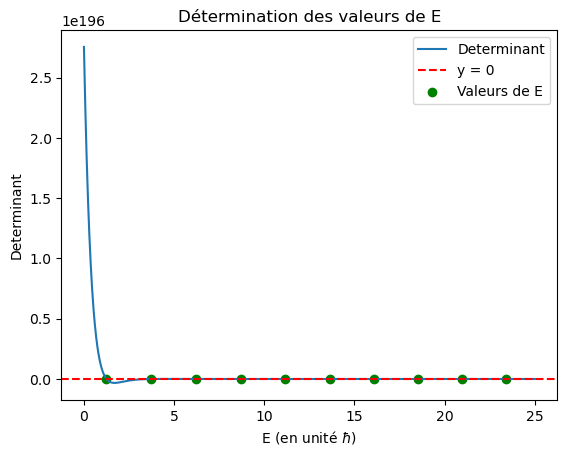

Valeurs de E possible: [1.2481872157886855, 3.740470176153574, 6.224682846183582, 8.701070665055337, 11.169507743574698, 13.629961056550874, 16.082388776209783, 18.52674952744197, 20.96300981333063, 23.391120165063345]


In [11]:
E = np.linspace(1,10,1000)
def matOsc(L, E, Dx, m,om):
    A = matA(L, E, Dx, m)
    
    for i in range(L):
        A[i][i] = A[i][i] + 0.5*m*om**2*(i-0.5*L)**2
        
    return A

L = 100
om = 0.25
Dx = 1 / L
m = 1
E = np.linspace(0, 25, 1000)  
d = np.zeros(len(E))          


for i in range(len(E)):
    A = matOsc(L, E[i], Dx, m,om)
    d[i] = np.linalg.det(A)


zero_crossings = []
for i in range(len(d) - 1):
    if d[i] * d[i + 1] < 0:  
        root = E[i] - (d[i] * (E[i + 1] - E[i]) / (d[i + 1] - d[i]))
        zero_crossings.append(root)


plt.plot(E, d, label="Determinant")
plt.axhline(0, color='red', linestyle='--', label="y = 0")  # Horizontal line at y=0
plt.scatter(zero_crossings, [0] * len(zero_crossings), color='green', label="Valeurs de E")
plt.xlabel("E (en unité $\hbar$)")
plt.ylabel("Determinant")
plt.title("Détermination des valeurs de E")
plt.legend()
plt.show()


print("Valeurs de E possible:", zero_crossings)

Ici E doit suivre un paterne linéaire $\alpha(n+0.5)$. Vérifions si c'est le cas. Si $u = \frac{E_{i+1}}{E_{i}}$. Alors $n = \frac{1.5 - 0.5u}{u-1}$

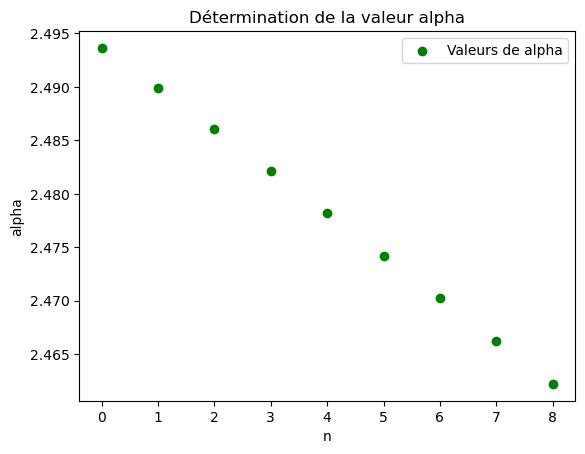

array([8.20827987e-04, 1.00569644e+00, 2.01361390e+00, 3.02493112e+00,
       4.03961377e+00, 5.05774221e+00, 6.07938431e+00, 7.10458545e+00,
       8.13346668e+00])

In [12]:
alpha = np.zeros(len(zero_crossings)-1)
ncorr = np.zeros(len(zero_crossings)-1) 
n = np.zeros(len(zero_crossings)-1) 
for i in range(len(zero_crossings)-1) :
    alpha[i] = zero_crossings[i+1]/(i+1.5)
    u = zero_crossings[i+1]/zero_crossings[i]
    n[i] = (1.5-0.5*u)/(u-1)
    ncorr[i] =i


plt.scatter(ncorr,alpha, color='green', label="Valeurs de alpha")
plt.xlabel("n")
plt.ylabel("alpha")
plt.title("Détermination de la valeur alpha")
plt.legend()
plt.show()
n

### 5. Equation de Schrodinger dépendante du temps.

Prenons une oscillateur harmonique dont on connait l'état initiale. Voyons comment celui-ci évolue en fonction du temps. Nous avons l'équation de Schrodinger : 

$$
-\frac{\hbar^2}{2m}\partial^2_x\Psi + V\Psi= i\hbar \partial_t\Psi 
$$

Ici, une fonction de Cauchy sera très difficile à trouver. Nous pouvons utiliser les techniques différences finis en ayant connaissance de la première fonction. La fonction de test sera une fonction linéaire. Nous allons retourné $|\Psi|^2$ en trouvant : 

$$
-\frac{\hbar^2}{2m}\frac{\Psi_{i-1,j} - 2\Psi_{i,j} + \Psi_{i+1,j}}{\Delta x^2} + V_i\Psi_{i,j}= i\hbar \frac{\Psi_{i,j+1} - \Psi_{i,j}}{\Delta t}
$$

Nous pouvons séparer la partie réel de $\Psi_{i,j+1}$: 
$$
Re(\Psi_{i,j+1}) = \Psi_{i,j}
$$
Et la partie imaginaire : 
$$
im(\Psi_{i,j+1}) = \frac{\hbar\Delta t}{2m}\frac{\Psi_{i-1,j} - 2\Psi_{i,j} + \Psi_{i+1,j}}{\Delta x^2} - \frac{V_i\Delta t}{\hbar}\Psi_{i,j}
$$
Puis nous pouvons continuer avec la partie imaginaire de Psy (c'est à dire 4 différentes possibilités)


Nous pouvons conclure :
$$
|\Psi|^2 = Re(\Psi_{i,j+1})^2 + im(\Psi_{i,j+1})^2
$$

Nous savons que l'intégrale de $|\Psi|^2$ doit être égale à 1. Nous ferons donc attention à multiplier à chaque fois par un coefficient pour conserver la propriétée. Cette intégrale sera faite à l'aide de la formule de Sympson

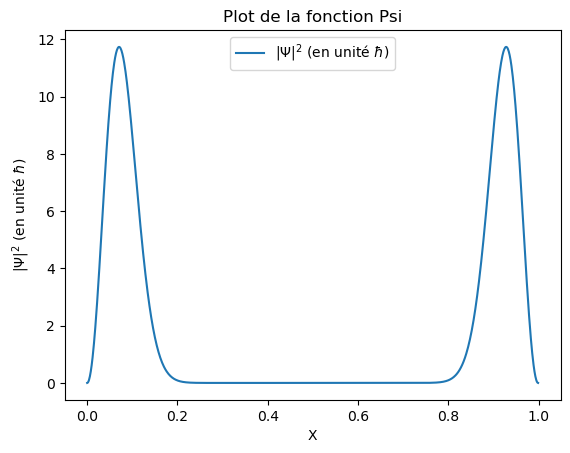

In [13]:
L = 1
dx = 0.001
N = int(L/dx)
omega = 1
m = 1

dt = 0.001
T = 10

X = np.zeros(N)

for i in range(N) : 
    X[i] = i*dx

Psi0 = np.full(N, 1/np.sqrt(L))
Z = np.zeros(N)
Psi0[0] = 0
Psi0[-1] = 0
Psi0[1] = 0
Psi0[-2] = 0

def schro(V,T,Psiim0,Psire0,m,dt,dx) :
    h = 1
    Psiim1 = Psiim0
    Psire1 = Psire0
    
    Psiim2 = Psiim0
    Psire2 = Psire0
    
    
    
    
    chrono = 0
    while (chrono < T) : 
        for i in range(N-2) : 
            Psire2[i+1] = Psire1[i+1]
            Psire2[i+1] = Psire2[i+1] - h**2*dt*(Psiim1[i] - 2*Psiim1[i+1] + Psiim1[i+2])/(dx**2*2*m) + V[i+1]*dt*Psiim1[i+1]/h
            
            Psiim2[i+1] = h**2*dt*(Psire1[i] - 2*Psire1[i+1] + Psire1[i+2])/(dx**2*2*m) - V[i+1]*dt*Psire1[i+1]/h
            Psiim2[i+1] = Psiim2[i+1] - Psiim1[i+1]   
        
        chrono += dt
    
        P = Psire1
        for i in range(N) : 
            P[i] = Psire1[i]**2 + Psiim1[i]**2

        Psq = 0
        j = 0
        while j < N-2: 
            sqdown = Psire2[j]**2 + Psiim2[j]**2
            sq = Psire2[j+1]**2 + Psiim2[j+1]**2
            squp = Psire2[j+2]**2 + Psiim2[j+2]**2

            Psq += dx*(sqdown + 4*sq + squp)/6
            j += 2

        Psiim1 = np.copy(Psiim2)/np.sqrt(Psq)
        Psire1 = np.copy(Psire2)/np.sqrt(Psq) 
        
    return P

def Vosc(dx,m,omega,N) :
    V = np.zeros(N)
    for i in range(N) : 
        V[i] = 0.5*m*(omega*(i*dx - L/2))**2
        
    return V

V = Vosc(dx,m,omega,N)
P = schro(V,T,Z,Psi0,m,dt,dx)

plt.plot(X, P, label="$|\Psi|^2$ (en unité $\hbar$)")
plt.xlabel("X")
plt.ylabel("$|\Psi|^2$ (en unité $\hbar$)")
plt.title("Plot de la fonction Psi")
plt.legend()
plt.show()

Remarquons que la condition V a tendance à creser le milieu. De plus avec la coupure entre le 1 et le 0 de la condition initiale. Nous passons d'une probabilité uniforme à ce que l'on voit ici.

### 6. Calcul de la dispersion 

Nous avons notre fonction d'onde (nous utiliserons P). Nous pouvons utiliser la formule : 
$$
\langle x \rangle = \int_\Omega \Psi \hat{x} \Psi^* dx
$$

Comme $\hat{x} = x$ et n'a pas d'effet sur $\Psi^*$, nous pouvons écrir : 
$$
\langle x \rangle = \int_\Omega x|\Psi|^2 dx
$$

De même pour $x^2$ :
$$
\langle x^2 \rangle = \int_\Omega x^2|\Psi|^2 dx
$$

Nous pouvons par la suite calculer la dispersion : 
$$
\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}
$$

Nous continuerons d'utiliser la formule de sympson

In [14]:
def calcx (P,L) : 
    N = len(P)
    dx = L/N
    j = 0
    Psq = 0
    while j < N-2: 
        sqdown = P[j]*dx*j
        sq = P[j+1]*dx*(j+1)
        squp = P[j+2]*dx*(j+2)

        Psq += dx*(sqdown + 4*sq + squp)/6
        j += 2
    
    return Psq

def calcxsq (P,L) : 
    N = len(P)
    dx = L/N
    j = 0
    Psq = 0
    while j < N-2: 
        sqdown = P[j]*(dx*j)**2
        sq = P[j+1]*(dx*(j+1))**2
        squp = P[j+2]*(dx*(j+2))**2

        Psq += dx*(sqdown + 4*sq + squp)/6
        j += 2
    
    return Psq

x = calcx (P,L)
xsq = calcxsq (P,L)

Var = xsq - x**2
sig = np.sqrt(Var)

sig

0.4210597558377925

### 7. Le point critique de Van der Waals

On connait l'équation de Van der Waals $P(T,V_n) = \frac{RT}{V_n - b} - \frac{a}{V_n^2}$ et nous savons que le point critique a pour particularité $\frac{dP}{dT} = \frac{dP}{dV_n} = 0$. Donc nous allons faire, après avoir quadrié notre fonction qui sera représenté par une matrice (T,V). Nous pouvons construire 2 matrices $\frac{dP}{dT}$ et $\frac{dP}{dV_n}$ et les multiplier entre elles pour trouver le point le plus petit. Nous allons tester cette technique avec l'eau, a = 5.537 et b = 0.03049

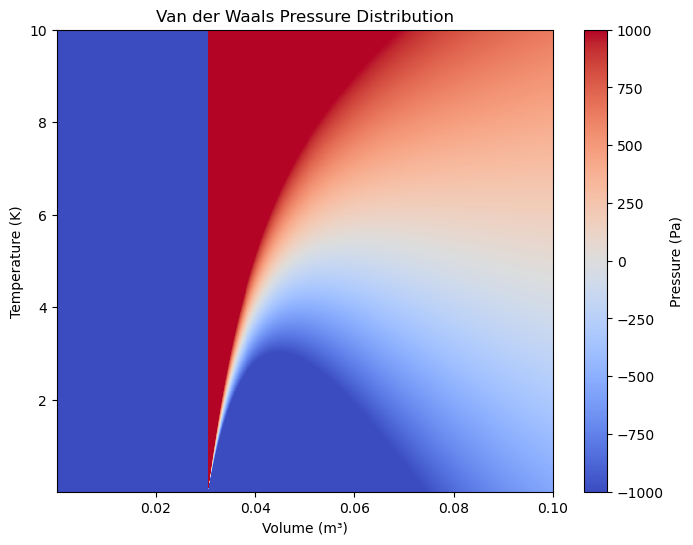

In [15]:
dV = 0.0001
Vm = 0.1
dT = 0.01
Tm = 10
a = 5.53
b = 0.03049

max_pressure= 1000

def VanDerWaals(dV, Vm, dT, Tm, a, b,max_pressure):
    R = 8.3145
    V_points = int(Vm/dV)
    T_points = int(Tm/dT)
    
    P = np.zeros((T_points, V_points))
    
    for i in range(T_points):
        for j in range(V_points):
            V = (j+1)*dV
            T = (i+1)*dT
            p = R*T/(V-b) - a/V**2
            
            if p < 0 : 
                P[i,j] = max(p,-max_pressure)
                
            if p > 0 :
                P[i,j] = min(p,max_pressure)
    
    return P

P = VanDerWaals(dV, Vm, dT, Tm, a, b,max_pressure)


V_values = np.linspace(dV, Vm, int(Vm / dV))
T_values = np.linspace(dT, Tm, int(Tm / dT))


plt.figure(figsize=(8, 6))
plt.pcolormesh(V_values, T_values, P, shading='auto', cmap='coolwarm')
plt.colorbar(label='Pressure (Pa)')
plt.xlabel("Volume (m³)")
plt.ylabel("Temperature (K)")
plt.title("Van der Waals Pressure Distribution")
plt.show()

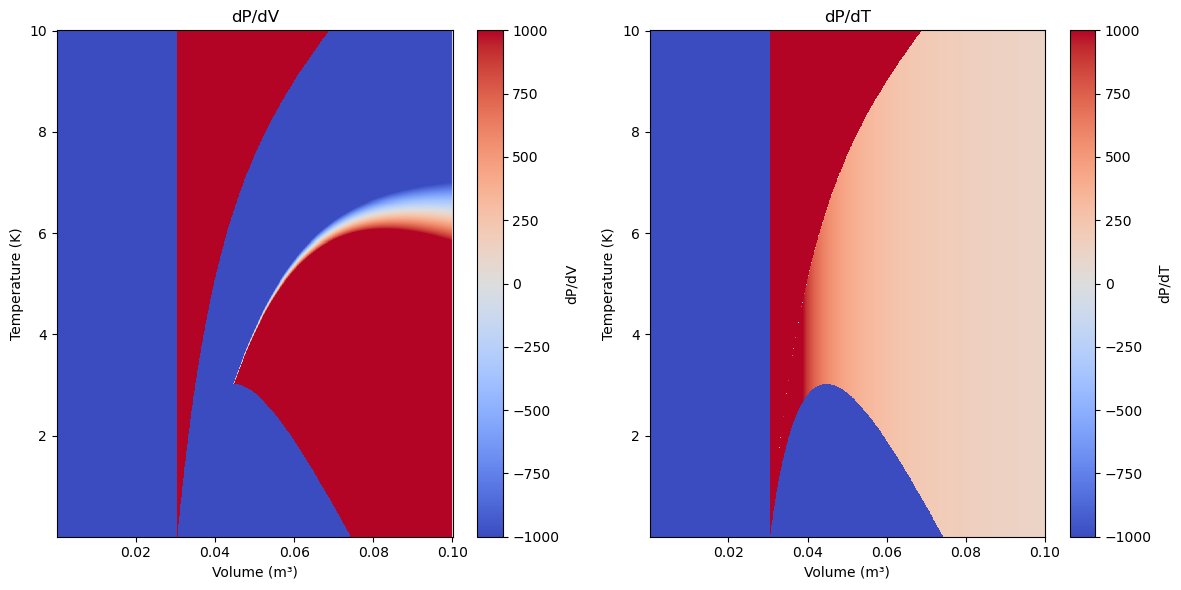

In [16]:
V_points = int(Vm/dV)
T_points = int(Tm/dT)
PartialV = np.zeros((T_points, V_points))
PartialT = np.zeros((T_points, V_points))


for i in range(int(Tm/dT) - 1) :
    for j in range(int(Vm/dV) - 1) :
        pv = (P[i,j+1] - P[i,j])/dV
        pt = (P[i+1,j] - P[i,j])/dT
        
        if pv < 0 : 
            PartialV[i,j] = max(pv,-max_pressure)
                
        if pv > 0 :
            PartialV[i,j] = min(pv,max_pressure)
            
        if pt < 0 : 
            PartialT[i,j] = max(pt,-max_pressure)
                
        if pt > 0 :
            PartialT[i,j] = min(pt,max_pressure)
        
        if P[i,j] == max_pressure :
            PartialV[i,j] = max_pressure
            PartialT[i,j] = max_pressure
            
        if P[i,j] == -max_pressure :
            PartialV[i,j] = -max_pressure
            PartialT[i,j] = -max_pressure

            
V_values = np.linspace(dV, Vm, int(Vm / dV))
T_values = np.linspace(dT, Tm, int(Tm / dT))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

c1 = axes[0].pcolormesh(V_values, T_values, PartialV, shading='auto', cmap='coolwarm')
fig.colorbar(c1, ax=axes[0], label='dP/dV')
axes[0].set_xlabel("Volume (m³)")
axes[0].set_ylabel("Temperature (K)")
axes[0].set_title("dP/dV")

c2 = axes[1].pcolormesh(V_values, T_values, PartialT, shading='auto', cmap='coolwarm')
fig.colorbar(c2, ax=axes[1], label='dP/dT')
axes[1].set_xlabel("Volume (m³)")
axes[1].set_ylabel("Temperature (K)")
axes[1].set_title("dP/dT")

plt.tight_layout()
plt.show()

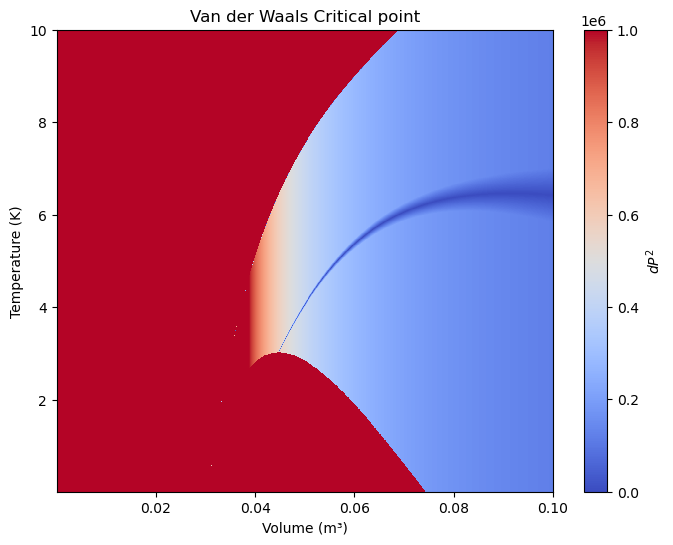

(5.53, 0.0618)

In [17]:
crit = np.zeros((T_points, V_points))
Ptn_crit = (0,0)
P_critsq = max_pressure**2

for i in range(int(Tm/dT) - 1) :
    for j in range(int(Vm/dV) - 1) :
        crit[i,j] = np.abs(PartialV[i,j]*PartialT[i,j])
        
        if P[i,j] == max_pressure :
            crit[i,j] = max_pressure**2
            
        if P[i,j] == -max_pressure :
            crit[i,j] = max_pressure**2

for i in range(int(Tm/dT) - 2) :
    for j in range(int(Vm/dV) - 2) :
        if (crit[-i,-j] < P_critsq) and (crit[i,j] < crit[i-1,j]) and (crit[i,j] < crit[i+1,j]) and (crit[i,j] < crit[i,j+1]) and (crit[i,j] < crit[i,j-1]):
            Ptn_crit = (Tm - dT*i,Vm - dV*j)
            P_critsq = crit[-i,-j]
        

        
        
plt.figure(figsize=(8, 6))
plt.pcolormesh(V_values, T_values, crit, shading='auto', cmap='coolwarm')
plt.colorbar(label='$dP^2$')
plt.xlabel("Volume (m³)")
plt.ylabel("Temperature (K)")
plt.title("Van der Waals Critical point")
plt.show()

Ptn_crit

Les vraies valeurs sont 6.47 et 0.09147. Le problème ici est la recherche de minimum, nous avons ici à faire à une crevasse uniformément égale à un petit nombre. La discrétisation imparfaire ne nous permet pas de tomber sur le point exact. Cependant nous trouvons le point sur le graph. Le graph est donc bon.

## Utilisation de Panda.

Nous allons tout d'abord utiliser un example de stack overflof pour le paramétrage

In [18]:
import pandas as pd

In [20]:
df = pd.read_csv('survey_results_public.csv')

In [21]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,...,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,...,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,...,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,...,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,...,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,...,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,...,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,...,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,...,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",...,0.0,NaN,NaN,NaN,NaN


In [22]:
df.shape

(65437, 114)

In [23]:
df.info

<bound method DataFrame.info of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork  ...  \
0      Employed, f

Puis un example inventé de toutes pièces, voyons comment montrer les données :

In [28]:
tmp = pd.read_csv('temp.csv',sep=';')
tmp

,Time,Temp Zone 1,Temp Zone 2,Temp Zone 3,Pression Zone 1,Pression Zone 2,Pression Zone 3
0,1,200,190,162.500000,1,1.5,1.000000
1,2,201,181,135.166667,2,2.5,1.666667
2,3,200,190,155.833333,1,1.5,1.333333
3,4,199,179,144.833333,2,1.5,1.333333
4,5,200,170,124.166667,3,2.5,1.666667
...,...,...,...,...,...,...,...
94,95,202,152,49.500000,5,6.5,3.500000
95,96,201,141,23.500000,6,7.5,4.000000
96,97,200,130,89.166667,7,3.5,1.166667
97,98,201,121,74.333333,8,4.0,1.333333


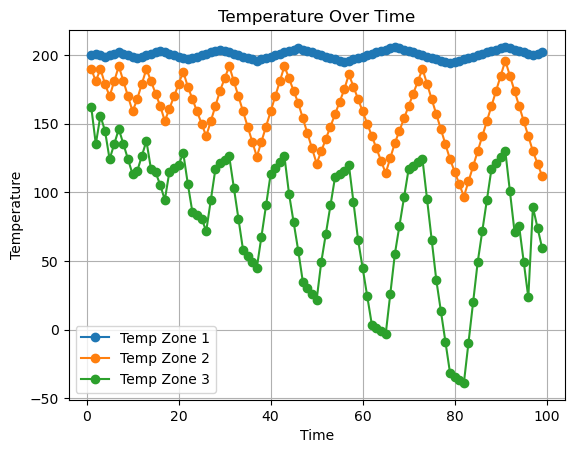

In [29]:
plt.plot(tmp['Time '], tmp['Temp Zone 1'], marker='o', linestyle='-', label='Temp Zone 1')
plt.plot(tmp['Time '], tmp['Temp Zone 2'], marker='o', linestyle='-', label='Temp Zone 2')
plt.plot(tmp['Time '], tmp['Temp Zone 3'], marker='o', linestyle='-', label='Temp Zone 3')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

plt.legend()
plt.grid(True)
plt.show()

In [30]:
tmp.describe()

,Time,Temp Zone 1,Temp Zone 2,Temp Zone 3,Pression Zone 1,Pression Zone 2,Pression Zone 3
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,200.393939,157.969697,80.932660,4.242424,4.222222,2.796296
std,28.722813,2.743520,23.583311,47.697013,2.321553,1.877936,1.099256
min,1.000000,194.000000,97.000000,-38.833333,1.000000,1.500000,1.000000
25%,25.500000,198.500000,141.000000,49.500000,2.000000,2.500000,2.000000
50%,50.000000,200.000000,163.000000,92.833333,4.000000,3.500000,2.333333
75%,74.500000,202.000000,178.000000,118.500000,6.000000,5.500000,3.416667
max,99.000000,206.000000,196.000000,162.500000,10.000000,8.500000,5.666667


In [31]:
tmp.min()

Time                 1.000000
Temp Zone 1        194.000000
Temp Zone 2         97.000000
Temp Zone 3        -38.833333
Pression Zone 1      1.000000
Pression Zone 2      1.500000
Pression Zone 3      1.000000
dtype: float64

In [32]:
tmp[12:15]

,Time,Temp Zone 1,Temp Zone 2,Temp Zone 3,Pression Zone 1,Pression Zone 2,Pression Zone 3
12,13,200,190,137.500000,1,2.5,2.000000
13,14,201,181,116.833333,2,3.5,2.333333
14,15,202,172,114.500000,3,3.5,2.000000


In [33]:
tmp.loc[12:15,['Temp Zone 1','Temp Zone 2']]

,Temp Zone 1,Temp Zone 2
12,200,190
13,201,181
14,202,172
15,203,163


In [34]:
tmp.iloc[12:15,[1,2]]

,Temp Zone 1,Temp Zone 2
12,200,190
13,201,181
14,202,172


Maintenant que nous avons vu tous ça, nous pouvons couper certaines données et faire le tri et filtrer :

In [35]:
tmp[tmp['Temp Zone 3'] < 0]

,Time,Temp Zone 1,Temp Zone 2,Temp Zone 3,Pression Zone 1,Pression Zone 2,Pression Zone 3
63,64,203,123,-1.166667,8,7.5,4.333333
64,65,204,114,-3.500000,9,7.5,4.000000
77,78,195,135,-9.166667,6,7.5,5.333333
78,79,194,124,-31.833333,7,8.5,5.666667
79,80,195,115,-34.166667,8,8.5,5.333333
80,81,196,106,-36.500000,9,8.5,5.000000
81,82,197,97,-38.833333,10,8.5,4.666667
82,83,198,108,-9.500000,9,7.5,4.000000


Et enfin rajouter de nouvelles colonnes et lignes

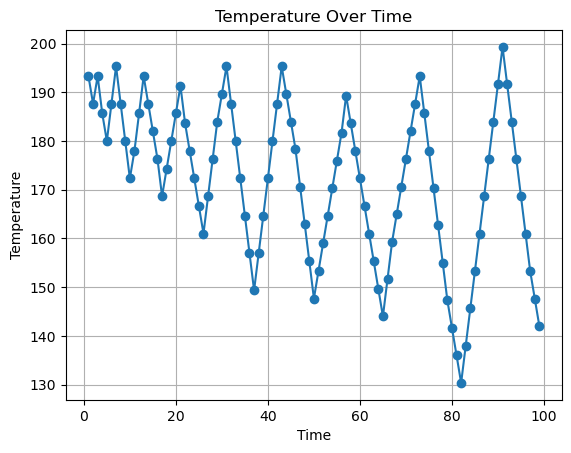

In [36]:
tmp["meanTemp"] = (tmp["Temp Zone 1"] + tmp["Temp Zone 2"] + tmp["Temp Zone 2"])/3
plt.plot(tmp['Time '], tmp["meanTemp"], marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

plt.grid(True)
plt.show()

nous pouvons aussi renomer des collones :

In [37]:
tmp.columns = ["Time","Temp_Zone_1","Temp_Zone_2","Temp_Zone_3","Pression_Zone_1","Pression_Zone_2","Pression_Zone_3","Mean_Temp"]
tmp.columns

Index(['Time', 'Temp_Zone_1', 'Temp_Zone_2', 'Temp_Zone_3', 'Pression_Zone_1',
       'Pression_Zone_2', 'Pression_Zone_3', 'Mean_Temp'],
      dtype='object')